In [1]:
from PINN_model import PINN
import utils.helper_functions_PINN as hf_PINN
import utils.helper_functions as hf
import utils.fun as fun
import numpy as np
import torch
import matplotlib.pyplot as plt

In [1]:
from PINN_model import PINN

N_colloc = 21
filename = 'in_silico_dataset.csv'
hidden_layers = [128, 128, 128]

pinn = PINN(N_colloc, filename, hidden_layers)
pinn.create_model()
pinn.pre_training(epochs=1, lr=1e-3, data_loss_batch=32)
pinn.training(epochs=10, lr=5e-4, ode_loss_batch=10, bc_loss_batch=32)


DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 

Start of DNN model training.
[DNN] Epoch 00001/00001, Loss: 7.995767e-03, LR: 1.0e-03

Updated Parameters with Excel
Start of PINN model training.
loss_data: 1.028e-03, loss_vol_bc: 4.804e-01, loss_phi_bc: 4.806e-01, loss_N_j_bc: 4.421e+09, loss_vol_ode: 5.517e-05, loss_phi_ode: 4.296e-03, loss_N_j_ode: 2.743e+07
lam_data: 1120993280000.50, lam_vol_bc: 138337633435648.50, lam_phi_bc: 1570194849792.50, lam_N_j_bc: 1.00, lam_vol_ode: 1211205104166764544.00, lam_phi_ode: 71329759887360.50, lam_N_j_ode: 59.03
scaled loss_data: 1.152e+09, scaled loss_vol_bc: 6.646e+13, scaled loss_phi_bc: 7.546e+11, scaled loss_N_j_bc: 4.421e+09, scaled loss_vol_ode: 6.682e+13, scaled loss_phi_ode: 3.064e+11, scaled loss_N_j_ode: 1.619e+09
step: 0.0, loss: 1.343e+14
loss_data: 4.391e-03, loss_vol_bc: 4.804e-01, loss_phi_bc: 4.797e-01, loss_N_j_bc: 9.698e+08, loss_vol_ode: 1.489e-04, loss_phi_ode: 4.628e-03, loss_N_j_ode: 5.364e+06
lam_data

KeyboardInterrupt: 

In [ ]:
N_colloc = 21
filename = 'in_silico_dataset.csv'
data_loss_batch = 32
hidden_layers = [128, 128, 128]

pinn = PINN(N_colloc, filename, hidden_layers)
pinn.create_model()

pinn.model.load_state_dict(torch.load("DNN.pt"))
pinn.model.eval()  # Set to evaluation mode




DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 



C:\Users\iagr9\AppData\Local\Temp\ipykernel_35708\284161737.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pinn.model.load_state_dict(torch.load("DNN.pt"))


DNN(
  (net): Sequential(
    (layer0): Linear(in_features=4, out_features=128, bias=True)
    (tanh0): Tanh()
    (layer1): Linear(in_features=128, out_features=128, bias=True)
    (tanh1): Tanh()
    (layer2): Linear(in_features=128, out_features=128, bias=True)
    (tanh2): Tanh()
    (layer3): Linear(in_features=128, out_features=23, bias=True)
    (sigmoid): Sigmoid()
  )
)

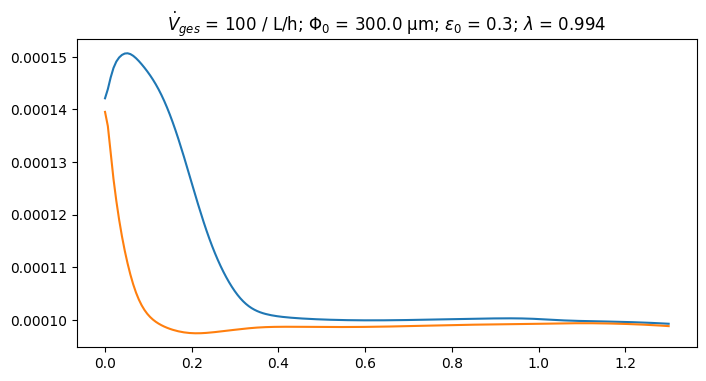

In [8]:
# vector x
dV_ges = 100
eps_0 = 0.3
phi_0 = 300e-6
_, _, d_j, _ = fun.initialize_boundary_conditions(eps_0, phi_0, 2.5*phi_0, 'Output', N_D=20, plot=False)


x_line = np.linspace(0.0, 1.3, 201)
Y_list = hf_PINN.predict_outputs_np(pinn.model, dV_ges=dV_ges, eps_0=eps_0, phi_0=phi_0, x=x_line, X_min=pinn.X_min, X_max=pinn.X_max, Y_min=pinn.Y_min, Y_max=pinn.Y_max)
Y_list = np.array(Y_list)

V_c_x = Y_list[:,1]
V_dpz_x = Y_list[:,0] 
N_j = Y_list[:,3:] 
lam = hf.calc_efficiency(d_j, N_j)
plt.figure(figsize=(8,4))
plt.plot(x_line, V_c_x + V_dpz_x)
plt.plot(x_line,V_c_x)
# plt.grid()
plt.title(rf'$\dot{{V}}_{{ges}}$ = {dV_ges} / L/h; ' rf'$\Phi_0$ = {1e6*phi_0} µm; ' rf'$\epsilon_0$ = {eps_0}; '  rf'$\lambda$ = {lam:.3f}')
plt.show()


In [8]:
print('lam_data, bc, ode: ',[0, 0, 0], 'loss_data, _bc, _ode= ',[0, 0, 0])

lam_data, bc, ode:  [0, 0, 0] loss_data, _bc, _ode=  [0, 0, 0]
